# pima indians diabetes.csv 활용한 딥러닝 모델

In [2]:
import pandas as pd
df = pd.read_csv("Data/pima indians diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

X = df.drop("Outcome", axis = 1).values
Y = df["Outcome"].values

train_x, test_x, train_y, test_y = train_test_split(X, Y, stratify = Y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

In [34]:
train_scaled.shape
# 데이터가 576개가 있고, 8개의 특성

(576, 8)

## early stopping 쓰더라도 과대적합 최대한 줄이고 쓰는게 좋음
 1. 은닉층의 노드 수를 줄이거나 (ex. 노드수 8개면 4개로) 은닉층의 수를 줄인다 (ex. 은닉층 2개면 1개로)
 2. Dropout으로 은닉층의 노드 중 랜덤으로 일부를 꺼버린다
 3. BatchNormalization으로 한번 표준화해준다   
=> 다 한 후에 es 

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Input, Activation, Dropout, BatchNormalization   
from tensorflow import keras

# 인공신경망을 만들기 위한 도화지
model = keras.Sequential([       # 도화지 안에 리스트 
    Input(shape = (8,)),      # 8개의 노드가 있는 입력층 
    
    Dense(16),           # 16개의 노드가 있는 은닉층으로 
    BatchNormalization(),      # 한번 표준화 해줘서  학습시간 개선, 과대적합 개선 
    Activation("relu"),
    Dropout(0.3),          # 16개의 노드 중 랜덤으로 30%를 꺼버리겠다 = 컴퓨터가 완벽한 계산 못하게 하여 과대적합 막음
    
    Dense(8),               # 8개의 노드가 있는 은닉층으로 
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3), 

    Dense(2),                    # 2개의 노드(1, 0)가 있는 출력층
    Activation("softmax")
])    

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 2)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394 (1.54 KB)

 Trainable params: 346 (1.35 KB)

 Non-trainable params: 48 (192.00 B)

In [42]:
es = keras.callbacks.EarlyStopping(patience=10, restore_best_weights = True)

model.compile(loss = "sparse_categorical_crossentropy", 
              metrics = ["accuracy"],
              optimizer = "adam")

history = model.fit(train_scaled, train_y, epochs=500,         # 딥러닝 모델이 전체 학습 데이터를 최대 500번 반복 학습
                    validation_data=(test_scaled, test_y),
                    callbacks = [es])

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4152 - loss: 1.2498 - val_accuracy: 0.3490 - val_loss: 1.1169
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4341 - loss: 1.2157 - val_accuracy: 0.3802 - val_loss: 0.9652
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5204 - loss: 0.9931 - val_accuracy: 0.4896 - val_loss: 0.8660
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4946 - loss: 1.0246 - val_accuracy: 0.5938 - val_loss: 0.7839
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4960 - loss: 0.8877 - val_accuracy: 0.6458 - val_loss: 0.7259
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5906 - loss: 0.8711 - val_accuracy: 0.6771 - val_loss: 0.6842
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6398 - loss: 0.7356 - val_accuracy: 0.6823 - val_loss: 0.6530
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6200 - loss: 0.6977 - val_accuracy: 0.6719 - 

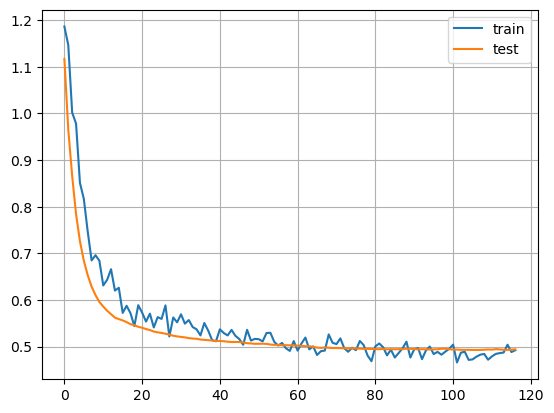

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])          # 학습은 잘되었으나
plt.plot(history.history["val_loss"])       # 쉬운 모델에 복잡한 딥러닝 모델 사용해서 과대적합 빨리 발생함
plt.legend(["train", "test"])
plt.grid()
plt.show()

# 머신러닝 / 딥러닝

In [3]:
# 머신러닝 / 딥러닝
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

## 머신러닝 (랜덤포레스트)

In [46]:
# 랜덤포레스트로 분류하는 모델 만들기

train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

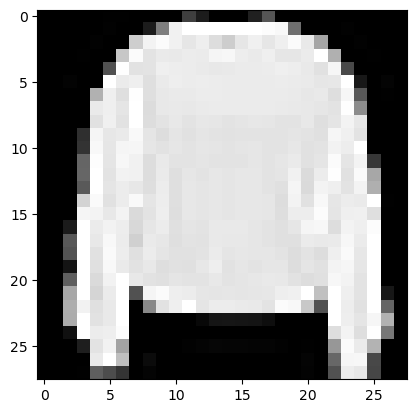

In [53]:
plt.imshow(train_x[7], cmap = "gray")
plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow import keras

train_scaled = train_x.reshape(-1, 28*28) / 255       # 3차원 -> 2차원으로 
test_scaled = test_x.reshape(-1, 28*28) / 255

model = RandomForestClassifier()
model.fit(train_scaled, train_y)      # 훈련데이터로만 학습

RandomForestClassifier()

In [67]:
model.score(test_scaled, test_y)      # 시험데이터로만 평가

# 랜덤포레스트 : 87.57%

0.8757

## 은닉층이 없는 인공신경망

In [9]:
import numpy as np
np.unique(test_y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [73]:
# 은닉층이 없는 인공신경망 만들고 학습

model = keras.Sequential([       # 도화지 안에 리스트 
    Input(shape = (784,)), 
    Dense(10),  
    Activation("softmax")
])    

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(loss = "sparse_categorical_crossentropy", 
              metrics = ["accuracy"],
              optimizer = "adam")

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True)

history = model.fit(train_scaled, train_y, epochs=500,
                    validation_data=(test_scaled, test_y),
                    callbacks = [es])

Epoch 1/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7371 - loss: 0.7878 - val_accuracy: 0.8250 - val_loss: 0.5077
Epoch 2/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8396 - loss: 0.4712 - val_accuracy: 0.8350 - val_loss: 0.4777
Epoch 3/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8509 - loss: 0.4347 - val_accuracy: 0.8381 - val_loss: 0.4686
Epoch 4/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8546 - loss: 0.4220 - val_accuracy: 0.8405 - val_loss: 0.4643
Epoch 5/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8611 - loss: 0.4056 - val_accuracy: 0.8377 - val_loss: 0.4588
Epoch 6/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8581 - loss: 0.4088 - val_accuracy: 0.8430 - val_loss: 0.4462
Epoch 7/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8595 - loss: 0.4038 - val_accuracy: 0.8406 - val_loss: 0.4593
Epoch 8/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8648 - loss: 0

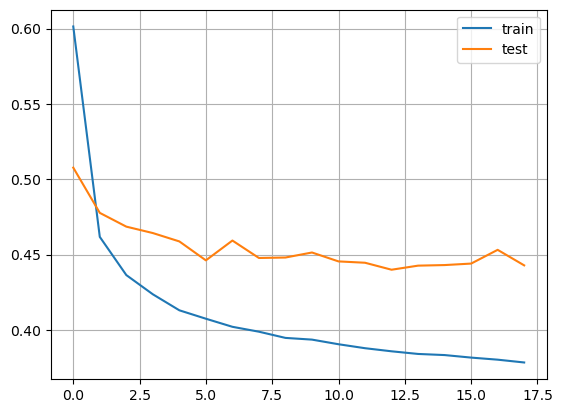

In [75]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"]) 
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()

# 18번만에 끝났으므로 학습이 13번만 되었다 

In [76]:
model.evaluate(test_scaled, test_y)
# [loss값, 정확도]

# 은닉층 없는 인공신경망 : 84.53%

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8485 - loss: 0.4302


[0.43998292088508606, 0.845300018787384]

## 은닉층 + 과대적합 잡은 인공신경망

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Input, Activation, Dropout, BatchNormalization   
from tensorflow import keras

# 은닉층 + 과대적합도 잡기!
model = Sequential([
    Input(shape = (784,)),

    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(10),
    Activation("softmax")
])

model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_scaled, train_y, epochs = 500,
                    validation_data=(test_scaled, test_y),
                    callbacks=[es])

Epoch 1/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7773 - loss: 0.6332 - val_accuracy: 0.8481 - val_loss: 0.4114
Epoch 2/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8481 - loss: 0.4142 - val_accuracy: 0.8552 - val_loss: 0.3977
Epoch 3/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8603 - loss: 0.3779 - val_accuracy: 0.8599 - val_loss: 0.3784
Epoch 4/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8741 - loss: 0.3471 - val_accuracy: 0.8782 - val_loss: 0.3367
Epoch 5/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8801 - loss: 0.3231 - val_accuracy: 0.8784 - val_loss: 0.3340
Epoch 6/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8821 - loss: 0.3155 - val_accuracy: 0.8762 - val_loss: 0.3489
Epoch 7/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8853 - loss: 0.3034 - val_accuracy: 0.8703 - val_loss: 0.3537
Epoch 8/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8916 - loss: 0

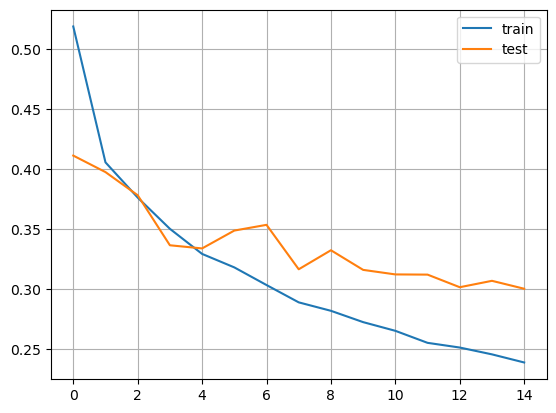

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"][:-5]) 
plt.plot(history.history["val_loss"][:-5])
plt.legend(["train", "test"])
plt.grid()
plt.show()

In [20]:
model.evaluate(test_scaled, test_y)
# [loss값, 정확도]

# 은닉층 2개 (과대적합 막진X) 인공신경망 : 88.49%
# 은닉층 2개 + BatchNormalization : 88.90%
# 은닉층 2개 + BatchNormalization + Dropout : 89.46%

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8955 - loss: 0.3038


[0.3004198372364044, 0.894599974155426]

# 이미지를 위한 딥러닝 - CNN

In [26]:
# 딥러닝(이미지)
# 일반적인 딥러닝은 공간적 구조 정보를 잘 이해하지 못하고 픽셀값만 학습한다는 문제점
# 컨볼루션 레이어 : 근접한 이미지의 정보도 함께 학습시킬 수 있음  =>  이걸로 학습한 모델이 CNN

from keras.layers import Conv2D, MaxPool2D, Flatten

(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

# CNN에 넣으려면 데이터가 4차원이어야함
train_scaled = train_x.reshape(-1, 28, 28, 1) / 255          # 개수, 가로, 세로, 채널 (흑백이면 1, 컬러면 3)
test_scaled = test_x.reshape(-1, 28, 28, 1) / 255

model = Sequential([
    Input(shape = (28, 28, 1)),
    
    Conv2D(filters=32, kernel_size = (3,3), padding = "same"),       # 이미지의 특징을 32번 잡고, 마스크size가 (3,3)
    Activation("relu"),
    MaxPool2D(pool_size = (2,2)),            # 32장의 이미지를 가로1/2배, 세로 1/2배로
    
    Conv2D(filters=32, kernel_size = (3,3), padding = "same"),      # 32개의 이미지에서 새로 32개의 특징 잡기 
    Activation("relu"),
    MaxPool2D(pool_size = (2,2)),            # 가로 7, 세로 7

    Flatten(),

    Dense(256),              # 노드 256개의 은닉층 
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3), 

    Dense(128),              # 노드 128개의 은닉층 
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3), 

    Dense(10),
    Activation("softmax")
])

In [27]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 446,954 (1.70 MB)

 Trainable params: 446,186 (1.70 MB)

 Non-trainable params: 768 (3.00 KB)

In [28]:
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_scaled, train_y, epochs = 500,
                    validation_data=(test_scaled, test_y),
                    callbacks=[es])

# 학습을 1번밖에 안했을때도 성능 86% 나옴

Epoch 1/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8019 - loss: 0.5641 - val_accuracy: 0.8661 - val_loss: 0.3646
Epoch 2/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8951 - loss: 0.2910 - val_accuracy: 0.9003 - val_loss: 0.2713
Epoch 3/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9088 - loss: 0.2489 - val_accuracy: 0.9085 - val_loss: 0.2451
Epoch 4/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9197 - loss: 0.2217 - val_accuracy: 0.9137 - val_loss: 0.2417
Epoch 5/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9256 - loss: 0.2005 - val_accuracy: 0.9193 - val_loss: 0.2287
Epoch 6/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9324 - loss: 0.1798 - val_accuracy: 0.9185 - val_loss: 0.2305
Epoch 7/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9374 - loss: 0.1694 - val_accuracy: 0.9114 - val_loss: 0.2625
Epoch 8/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9430 -

In [30]:
model.evaluate(test_scaled, test_y)

# 성능 92.1% <- 그냥 딥러닝으로는 아무리 높아도 이만큼 안나왔었음

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9190 - loss: 0.2306


[0.22312751412391663, 0.921500027179718]

In [31]:
import numpy as np
pred = np.argmax(model.predict(test_scaled), axis = 1)
pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.90      0.87      1000
           3       0.93      0.92      0.92      1000
           4       0.87      0.89      0.88      1000
           5       0.99      0.99      0.99      1000
           6       0.80      0.74      0.77      1000
           7       0.95      0.98      0.97      1000
           8       0.99      0.98      0.99      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [33]:
# convolution layer를 많이한다고 성능이 무조건 좋아지는 건 아니고,  어느순간부터는 컴퓨터도 못알아봄

# 이미지를 위한 딥러닝 활용예제

In [42]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

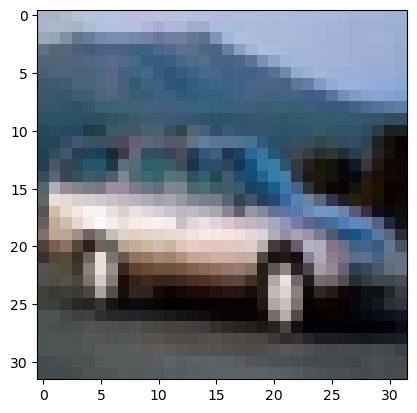

In [35]:
plt.imshow(train_x[4])
plt.show()

In [39]:
np.unique(test_y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [51]:
train_x.shape

(50000, 32, 32, 3)

In [52]:
# 컬러사진에서 10개의 카테고리를 분류하는 CNN모델

from keras.layers import Conv2D, MaxPool2D, Flatten

train_scaled = train_x.reshape(-1, 32, 32, 3) / 255          # 개수, 가로, 세로, 채널 (흑백이면 1, 컬러면 3)
test_scaled = test_x.reshape(-1, 32, 32, 3) / 255

model = Sequential([
    Input(shape = (32, 32, 3)),
    
    Conv2D(filters=32, kernel_size = (3,3), padding = "same"),  
    Activation("relu"),
    MaxPool2D(pool_size = (2,2)),  
    
    Conv2D(filters=32, kernel_size = (3,3), padding = "same"),   
    Activation("relu"),
    MaxPool2D(pool_size = (2,2)),  

    Flatten(),

    Dense(256),  
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3), 

    Dense(128),  
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3), 

    Dense(10),
    Activation("softmax")
])

In [53]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_29 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,410 (2.18 MB)

 Trainable params: 569,642 (2.17 MB)

 Non-trainable params: 768 (3.00 KB)

In [54]:
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

es = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(train_scaled, train_y, epochs = 500,
                    validation_data=(test_scaled, test_y),
                    callbacks=[es])

Epoch 1/500
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.3351 - loss: 1.9038 - val_accuracy: 0.4976 - val_loss: 1.3652
Epoch 2/500
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5389 - loss: 1.2988 - val_accuracy: 0.6336 - val_loss: 1.0273
Epoch 3/500
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6087 - loss: 1.1083 - val_accuracy: 0.6335 - val_loss: 1.0343
Epoch 4/500
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6403 - loss: 1.0219 - val_accuracy: 0.6824 - val_loss: 0.8973
Epoch 5/500
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6671 - loss: 0.9538 - val_accuracy: 0.6037 - val_loss: 1.1195
Epoch 6/500
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6828 - loss: 0.9121 - val_accuracy: 0.6800 - val_loss: 0.9085
Epoch 7/500
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7018 - loss: 0.8606 - val_accuracy: 0.6376 - val_loss: 1.0214
Epoch 8/500
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 

In [55]:
model.evaluate(test_scaled, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7300 - loss: 0.7699


[0.7752770781517029, 0.7282000184059143]